# CS579: Lecture 02
# Data Collection

<br><br>

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*

<br><br><br><br><br><br>
<br><br><br><br><br><br>
<br><br><br><br><br><br>

# Twitter

- Platform for broadcasting messages.
- https://twitter.com/justinbieber
<br><br><br><br><br><br>

# Twitter Jargon

- **tweet**: A message, max 140 characters
- **timeline**: A list of tweets from a user
- **follower**: If user $A$ follows $B$, $A$ will receive tweets from $B$'s timeline
- **friend**: If $A$ follows $B$, then $B$ is a *friend* of $A$.
  - Notice the asymmetry: If $A$ follows $B$, but $B$ does not follow $A$, then $A$ is not a friend of $B$.

<br><br><br><br><br><br>


# Twitter API

- https://dev.twitter.com/
- Provides programmatic access to *public* Twitter data
  - *direct messages* not included
  - A user can set their timeline to be private, but this is rare.
  
 <br><br><br><br><br><br>


# Twitter API

Two sub-APIs:
- *[REST API](https://dev.twitter.com/docs/api/1.1)*: Submit HTTP requests to access specific information (tweets, friends, ...)
- *[Streaming API](https://dev.twitter.com/docs/api/streaming)*: Open a continuous connection to Twitter to receive real-time data.

These APIs are simply HTTP GET requests:

https://api.twitter.com/1.1/search/tweets.json?q=chicago

<br><br><br><br><br><br>


# Authentication

- Twitter uses [OAuth](https://dev.twitter.com/docs/auth/oauth) to enable secure requests to the API
- After creating an account, you can generate tokens: https://dev.twitter.com/docs/auth/tokens-devtwittercom
- These tokens will be sent with each API request
- Many libraries exist to make this easier: https://dev.twitter.com/docs/twitter-libraries
<br><br><br><br><br><br>


In [52]:
# Create a Twitter connection using TwitterAPI:
#   https://github.com/geduldig/TwitterAPI
# Start with `pip install TwitterAPI`
# You'll need to edit twitter.cfg with your own tokens.
import ConfigParser
from TwitterAPI import TwitterAPI

def get_twitter(config_file):
    """ Read the config_file and construct an instance of TwitterAPI.
    Args:
      config_file ... A config file in ConfigParser format with Twitter credentials
    Returns:
      An instance of TwitterAPI.
    """
    config = ConfigParser.ConfigParser()
    config.read(config_file)
    twitter = TwitterAPI(
                   config.get('twitter', 'consumer_key'),
                   config.get('twitter', 'consumer_secret'),
                   config.get('twitter', 'access_token'),
                   config.get('twitter', 'access_token_secret'))
    return twitter

twitter = get_twitter('twitter.cfg')
print 'Established Twitter connection.'

Established Twitter connection.


In [59]:
type(twitter)

TwitterAPI.TwitterAPI.TwitterAPI

In [60]:
# What can we do with this twitter object?
# builtin method `dir` tells us...
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [61]:
# Get help on the `request` method using the builtin method called...`help`
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(self, resource, params=None, files=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [62]:
# Let's start by querying the search API
request = twitter.request('search/tweets', {'q': 'chicago'}) 

In [64]:
# What object is returned?
# builtin type method will tell us.
print type(request)
dir(request)

<class 'TwitterAPI.TwitterAPI.TwitterResponse'>


['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__iter__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_iterator',
 'get_rest_quota',
 'headers',
 'json',
 'response',
 'status_code',
 'stream',
 'text']

In [65]:
request.status_code
# See https://dev.twitter.com/overview/api/response-codes

200

In [66]:
for i in [1,2,3]:
    print i

1
2
3


In [68]:
print [i*2 for i in [1,2,3]]

[2, 4, 6]


In [69]:
# The __iter__ method means we can loop over this object.
# See https://wiki.python.org/moin/Iterator
tweets = [r for r in request]
# List comprehensions used a lot in Python. See:
# https://docs.python.org/2/tutorial/datastructures.html

In [70]:
print('found %d tweets' % len(tweets))

found 15 tweets


In [71]:
# What is the first tweet?
a_tweet = tweets[0]
type(a_tweet)

dict

In [72]:
# What can we do with dicts?
help(a_tweet)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __cmp__(...)
 |      x.__cmp__(y) <==> cmp(x,y)
 |  
 |  __contains__(...)
 |      D.__contains__(k) -> True if D has a key k, else False
 |  
 |  __delitem__(...)
 |      x.__delitem__(y) <==> del x[y]
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> x==y
 |  
 |  __ge__(...)
 |      x.__ge__(y) <==> x>=y
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(...)
 |      x.__gt__(y) <==> x>y
 |  
 |  __init__(

In [73]:
# Print keys.
a_tweet.keys()

[u'contributors',
 u'truncated',
 u'text',
 u'is_quote_status',
 u'in_reply_to_status_id',
 u'id',
 u'favorite_count',
 u'source',
 u'retweeted',
 u'coordinates',
 u'entities',
 u'in_reply_to_screen_name',
 u'in_reply_to_user_id',
 u'retweet_count',
 u'id_str',
 u'favorited',
 u'user',
 u'geo',
 u'in_reply_to_user_id_str',
 u'possibly_sensitive',
 u'lang',
 u'created_at',
 u'in_reply_to_status_id_str',
 u'place',
 u'metadata']

In [74]:
# The text.
print a_tweet['text']
print a_tweet['created_at']

Have you heard the news? Our 30th will be our last. MARY-ARRCHIE. #THISIS30 http://t.co/dOPgUSKcDG
Wed Aug 26 19:15:04 +0000 2015


In [75]:
# What is a user?...another dict
a_tweet['user']

{u'contributors_enabled': False,
 u'created_at': u'Wed Sep 23 16:17:12 +0000 2009',
 u'default_profile': False,
 u'default_profile_image': False,
 u'description': u'Legendary Chicago Theater Co. established 1986.\r\nhttp://t.co/TpI1XHU2bI',
 u'entities': {u'description': {u'urls': [{u'display_url': u'facebook.com/maryarrchie',
     u'expanded_url': u'http://facebook.com/maryarrchie',
     u'indices': [49, 71],
     u'url': u'http://t.co/TpI1XHU2bI'}]},
  u'url': {u'urls': [{u'display_url': u'maryarrchie.com',
     u'expanded_url': u'http://maryarrchie.com',
     u'indices': [0, 22],
     u'url': u'http://t.co/ZOYDzGo8We'}]}},
 u'favourites_count': 504,
 u'follow_request_sent': False,
 u'followers_count': 2229,
 u'following': False,
 u'friends_count': 1809,
 u'geo_enabled': False,
 u'has_extended_profile': False,
 u'id': 76682782,
 u'id_str': u'76682782',
 u'is_translation_enabled': False,
 u'is_translator': False,
 u'lang': u'en',
 u'listed_count': 67,
 u'location': u'Chicago, IL',
 u'

In [76]:
user = a_tweet['user']
print('screen_name=%s, name=%s, location=%s' % (user['screen_name'], user['name'], user['location']))

screen_name=maryarrchie, name=Mary-Arrchie, location=Chicago, IL


In [77]:
# Who follows this person?
# https://dev.twitter.com/docs/api/1.1/get/followers/list
screen_name = user['screen_name']
request = twitter.request('followers/list', {'screen_name': screen_name, 'count':200})
followers = [r for r in request]
        
print 'found %d followers for %s' % (len(followers), screen_name)
# See more about paging here: https://dev.twitter.com/docs/working-with-timelines

found 200 followers for maryarrchie


In [78]:
print type(followers[0])

<type 'dict'>


In [79]:
print followers[0].keys()

[u'follow_request_sent', u'has_extended_profile', u'profile_use_background_image', u'default_profile_image', u'id', u'profile_background_image_url_https', u'verified', u'blocked_by', u'profile_text_color', u'muting', u'profile_image_url_https', u'profile_sidebar_fill_color', u'entities', u'followers_count', u'profile_sidebar_border_color', u'id_str', u'profile_background_color', u'listed_count', u'status', u'is_translation_enabled', u'utc_offset', u'statuses_count', u'description', u'friends_count', u'location', u'profile_link_color', u'profile_image_url', u'following', u'geo_enabled', u'profile_banner_url', u'blocking', u'profile_background_image_url', u'screen_name', u'lang', u'profile_background_tile', u'favourites_count', u'name', u'notifications', u'url', u'created_at', u'contributors_enabled', u'time_zone', u'protected', u'default_profile', u'is_translator']


In [80]:
print followers[0]['screen_name']

TeatroVista


In [81]:
# What happens if we get an error?
request = twitter.request('followers/list', {'screen_name': 'this_is_not_a_valid_screen_name', 'count':200})

In [82]:
bad_followers = [r for r in request]

TwitterRequestError: Twitter request failed (404)

In [83]:
request.status_code

404

# Limitations

- Can only search 2 weeks in past
  - But can get up to 3,200 most recent tweets of a user
- Rate limits! https://dev.twitter.com/docs/rate-limiting/1.1/limits
  - e.g., 180 requests in 15 minute window

In [ ]:
# Working around rate limits.
def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request.
      params ..... A parameter dictionary for the request.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print >> sys.stderr, 'Got error:', request.text, '\nsleeping for 15 minutes.'
            sys.stderr.flush()
            time.sleep(61 * 15)

## Drawing graphs with NetworkX

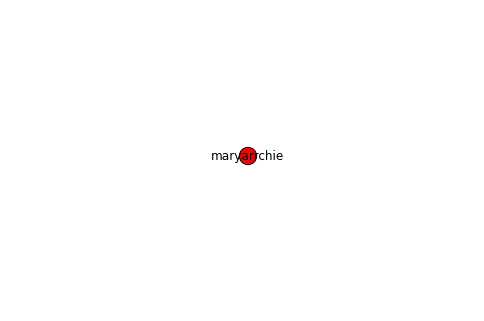

In [84]:
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node(screen_name)
# Draw the graph
nx.draw(graph, with_labels=True)

In [ ]:
# Didn't draw anything? Need to place it inline.
import matplotlib.pyplot as plt  
%matplotlib inline
# See many more magic spells:
# http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system

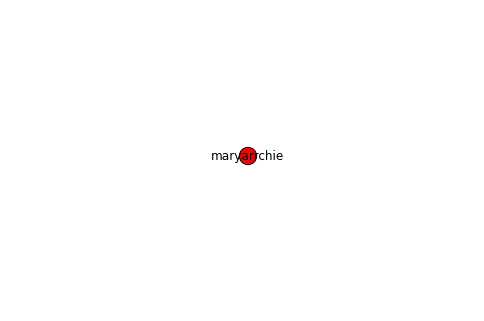

In [85]:
nx.draw(graph, with_labels=True)

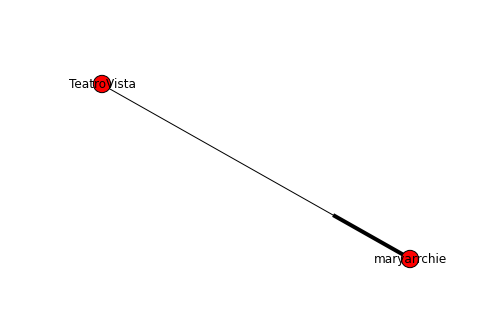

In [86]:
# Add an edge to a follower
graph.add_edge(followers[0]['screen_name'], screen_name)
nx.draw(graph, with_labels=True)

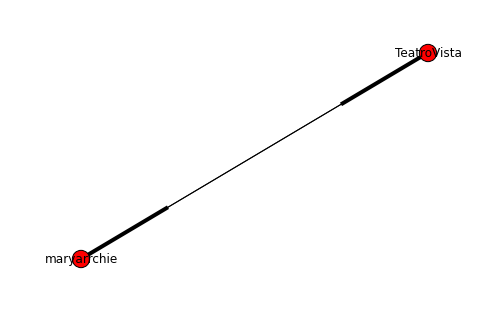

In [87]:
# Make link symmetric.
graph.add_edge(screen_name, followers[0]['screen_name'])
nx.draw(graph, with_labels=True)

In [88]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                                {'screen_name': screen_name,
                                                 'count': 200})]
print 'got %d tweets for user %s' % (len(timeline), screen_name)

got 200 tweets for user maryarrchie


In [89]:
# Print the text.
print '\n'.join(t['text'] for t in timeline)

Have you heard the news? Our 30th will be our last. MARY-ARRCHIE. #THISIS30 http://t.co/dOPgUSKcDG
RT @krisvire: .@maryarrchie Theatre Co. will close its doors after the 2015–16 season. http://t.co/iycP3XeAvy
RT @HedyWeissCritic: A mainstay of Chicago's off Loop theater scene, @maryarrchie, making 2015-16 season its last.
http://t.co/cJc9hLh5hR h…
RT @CarloLGarcia: LA @CarlolGarcia Arrivals for the 30th Annual Imagen Awards Photo Credit: Birdie Thompson/AdMedia @ImagenFound http://t.c…
Today is your chance to say goodbye to Abbie Fest at Angel Island. We are here until Midnight, probably later. Come on down.
ABBIE FEST XXVII IS THIS WEEKEND. BE THERE OR BE A SQUARE http://t.co/NVOac37BPR
RT @CarloLGarcia: We are 1 play away from securing our 30th anniversary season at @maryarrchie Thank you to @MrSamuelFrench for the support…
RT @drprchicago: Follow my peeps: @InterrobangThPr @IrishTheatreChi @KokandyProds @maryarrchie @thenewcolony @PivotArts @goruffians @Shatte…
RT @CarloLGarcia: Say

In [92]:
c = Counter()
c.update([1,2,1])
print c
c.update([1,2,1])
print c

Counter({1: 2, 2: 1})
Counter({1: 4, 2: 2})


In [93]:
# Count words
from collections import Counter  # This is just a fancy dict mapping from object->int, starting at 0.
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())
print('found %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

found 1357 unique terms in 200 tweets


[(u'rt', 100),
 (u'the', 95),
 (u'to', 66),
 (u'for', 63),
 (u'at', 47),
 (u'of', 46),
 (u'is', 39),
 (u'@carlolgarcia:', 37),
 (u'a', 35),
 (u'on', 35)]

In [98]:
sorted([5,4,-10,-1], key=lambda x: -x)

[5, 4, -1, -10]

In [99]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

print '\n'.join('%s=%d' % (item[0], item[1]) 
                 for item in sorted_counts)

rt=100
the=95
to=66
for=63
at=47
of=46
is=39
@carlolgarcia:=37
a=35
on=35
our=33
@maryarrchie=31
and=28
december=27
this=24
man=22
bad=22
in=22
@drprchicago:=21
you=21
de=20
magnet=18
-=17
#ourbadmagnet=17
angel=16
@maryarrchie's=14
(l'homme=14
by=14
with=14
decembre)=13
@carlolgarcia=13
thank=13
theatre=13
hellish=12
mary-arrchie=12
it=12
out=11
abbie=11
new=11
be=11
island=10
his=10
get=10
see=10
are=10
now=10
@getundercovers=10
carlo=9
tonight=9
we=9
opening=9
come=9
fest=9
back=9
&amp;=9
happy=9
us=9
chicago=8
(l’homme=8
season=8
lorenzo=8
beckett=8
your=8
company=7
my=7
i=7
recommended=7
up=7
#chicago=7
http:…=7
#vr4smallbiz=7
under=6
tickets=6
…=6
preview=6
help=6
#chicagotheatre=6
@buzzonstage:=6
theater=6
project=6
half-light=6
will=6
@funnyordie=6
.@maryarrchie's=6
like=6
drama=6
it's=6
an=6
plays=5
richard=5
meet=5
two=5
birthday=5
so=5
member=5
samuel=5
half-light:=5
magnets:=5
starts=5
@cowlgirltv=5
july=5
have=5
play=5
only=5
do=5
garcia=5
@getundercovers:=5
man,=5
co.=5
a

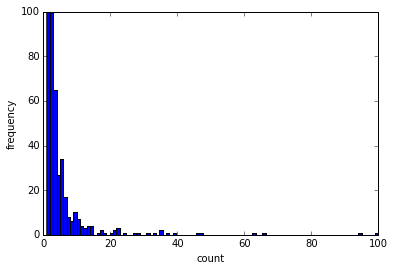

In [102]:
# Plot these counts.
plt.hist(counts.values(), bins=100)
plt.xlabel('count')
plt.ylabel('frequency')
plt.ylim((0,100))
plt.show()